# IMPORT LIBRARY

In [101]:
library(tidyverse)
library(pracma)
library(ggplot2)

# LOAD DATA

In [72]:
data = read.csv("../Dataset/Automobile_data.csv")
head(data)

symboling normalized.losses make        fuel.type aspiration num.of.doors
1 3         ?                 alfa-romero gas       std        two         
2 3         ?                 alfa-romero gas       std        two         
3 1         ?                 alfa-romero gas       std        two         
4 2         164               audi        gas       std        four        
5 2         164               audi        gas       std        four        
6 2         ?                 audi        gas       std        two         
  body.style  drive.wheels engine.location wheel.base ... engine.size
1 convertible rwd          front           88.6       ... 130        
2 convertible rwd          front           88.6       ... 130        
3 hatchback   rwd          front           94.5       ... 152        
4 sedan       fwd          front           99.8       ... 109        
5 sedan       4wd          front           99.4       ... 136        
6 sedan       fwd          front           99.8       ... 136        
  fuel.system bore stroke compression.ratio horsepower peak.rpm city.mpg
1 mpfi        3.47 2.68    9.0              111        5000     21      
2 mpfi        3.47 2.68    9.0              111        5000     21      
3 mpfi        2.68 3.47    9.0              154        5000     19      
4 mpfi        3.19 3.4    10.0              102        5500     24      
5 mpfi        3.19 3.4     8.0              115        5500     18      
6 mpfi        3.19 3.4     8.5              110        5500     19      
  highway.mpg price
1 27          13495
2 27          16500
3 26          16500
4 30          13950
5 22          17450
6 25          15250

In [73]:
str(data)

'data.frame':	205 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.of.

# DATA CLEANING

## Data Duplicated

In [74]:
cek_duplikat = function(data){
    dup = duplicated(data)
    if (sum(dup) > 0){
        print(paste("Terdapat duplicated sebanyak :", sum(dup)))
    } else{
        print("Tidak terdapat data duplicated")
    }
}

In [75]:
cek_duplikat(data)

[1] "Tidak terdapat data duplicated"


## Data Missing Value

 Karena terdapat data dengan simbol "?" maka perlu dilakukan manipulasi data

In [76]:
data[data == "?"] = NA
head(data)

symboling normalized.losses make        fuel.type aspiration num.of.doors
1 3         NA                alfa-romero gas       std        two         
2 3         NA                alfa-romero gas       std        two         
3 1         NA                alfa-romero gas       std        two         
4 2         164               audi        gas       std        four        
5 2         164               audi        gas       std        four        
6 2         NA                audi        gas       std        two         
  body.style  drive.wheels engine.location wheel.base ... engine.size
1 convertible rwd          front           88.6       ... 130        
2 convertible rwd          front           88.6       ... 130        
3 hatchback   rwd          front           94.5       ... 152        
4 sedan       fwd          front           99.8       ... 109        
5 sedan       4wd          front           99.4       ... 136        
6 sedan       fwd          front           99.8       ... 136        
  fuel.system bore stroke compression.ratio horsepower peak.rpm city.mpg
1 mpfi        3.47 2.68    9.0              111        5000     21      
2 mpfi        3.47 2.68    9.0              111        5000     21      
3 mpfi        2.68 3.47    9.0              154        5000     19      
4 mpfi        3.19 3.4    10.0              102        5500     24      
5 mpfi        3.19 3.4     8.0              115        5500     18      
6 mpfi        3.19 3.4     8.5              110        5500     19      
  highway.mpg price
1 27          13495
2 27          16500
3 26          16500
4 30          13950
5 22          17450
6 25          15250

In [77]:
cek_missingvalue = function(data){
    Missing = sapply(data, function(x) sum(is.na(x)))
    dt = data.frame(Missing)
    print(dt)
}

In [78]:
cek_missingvalue(data)

                  Missing
symboling               0
normalized.losses      41
make                    0
fuel.type               0
aspiration              0
num.of.doors            2
body.style              0
drive.wheels            0
engine.location         0
wheel.base              0
length                  0
width                   0
height                  0
curb.weight             0
engine.type             0
num.of.cylinders        0
engine.size             0
fuel.system             0
bore                    4
stroke                  4
compression.ratio       0
horsepower              2
peak.rpm                2
city.mpg                0
highway.mpg             0
price                   4


Terdapat beberapa variabel yang missing value antara lain normalized.losses, num.of.doors, bore, stroke, horsepower, peak.rpm, dan price

In [79]:
data$normalized.losses = as.integer(data$normalized.losses)
data$bore = as.numeric(data$bore)
data$stroke = as.numeric(data$stroke)
data$horsepower = as.integer(data$horsepower)
data$peak.rpm = as.integer(data$peak.rpm)
data$price = as.integer(data$price)
str(data)

'data.frame':	205 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalized.losses: int  NA NA NA 164 164 NA 158 NA 158 NA ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc

In [80]:
for (var in 1:ncol(data)){
    if (class(data[,var])=="character"){
        data[,var] = as.factor(data[,var])
    }
} 

In [81]:
str(data)

'data.frame':	205 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalized.losses: int  NA NA NA 164 164 NA 158 NA 158 NA ...
 $ make             : Factor w/ 22 levels "alfa-romero",..: 1 1 1 2 2 2 2 2 2 2 ...
 $ fuel.type        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration       : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 2 ...
 $ num.of.doors     : Factor w/ 2 levels "four","two": 2 2 2 1 1 2 1 1 1 2 ...
 $ body.style       : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 3 ...
 $ drive.wheels     : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 1 ...
 $ engine.location  : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ c

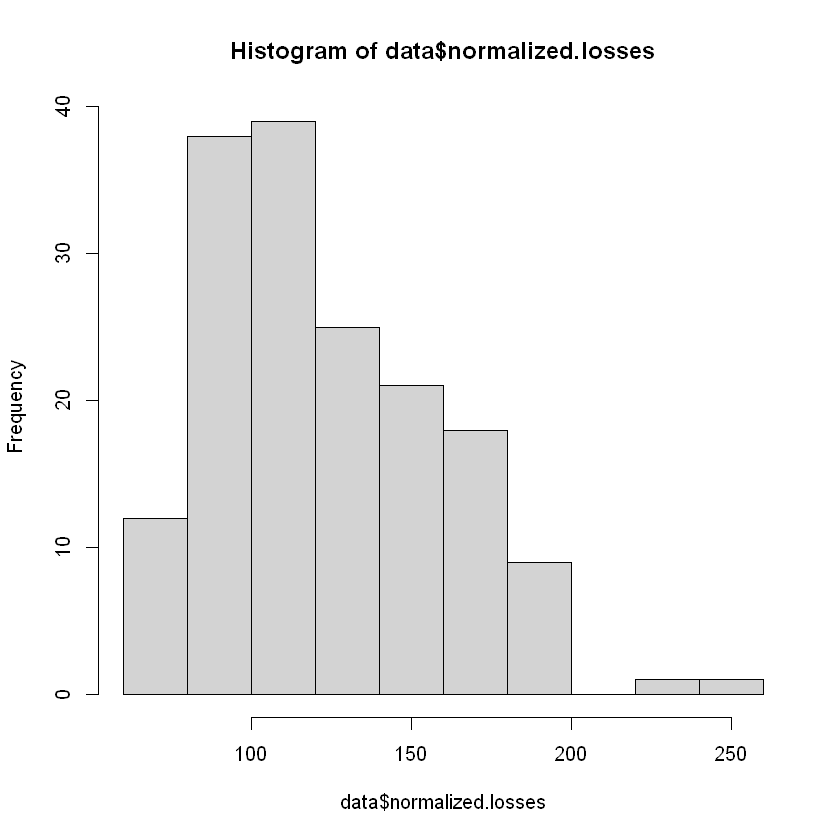

In [82]:
#Replace Missing Value: Normalized Losses
hist(data$normalized.losses)

In [83]:
data$normalized.losses[is.na(data$normalized.losses)] = median(data$normalized.losses, na.rm = TRUE)
cek_missingvalue(data)

                  Missing
symboling               0
normalized.losses       0
make                    0
fuel.type               0
aspiration              0
num.of.doors            2
body.style              0
drive.wheels            0
engine.location         0
wheel.base              0
length                  0
width                   0
height                  0
curb.weight             0
engine.type             0
num.of.cylinders        0
engine.size             0
fuel.system             0
bore                    4
stroke                  4
compression.ratio       0
horsepower              2
peak.rpm                2
city.mpg                0
highway.mpg             0
price                   4


In [84]:
#Replace Missing Value: Num.of.doors
data$num.of.doors[is.na(data$num.of.doors)] = Mode(data$num.of.doors)
cek_missingvalue(data)

                  Missing
symboling               0
normalized.losses       0
make                    0
fuel.type               0
aspiration              0
num.of.doors            0
body.style              0
drive.wheels            0
engine.location         0
wheel.base              0
length                  0
width                   0
height                  0
curb.weight             0
engine.type             0
num.of.cylinders        0
engine.size             0
fuel.system             0
bore                    4
stroke                  4
compression.ratio       0
horsepower              2
peak.rpm                2
city.mpg                0
highway.mpg             0
price                   4


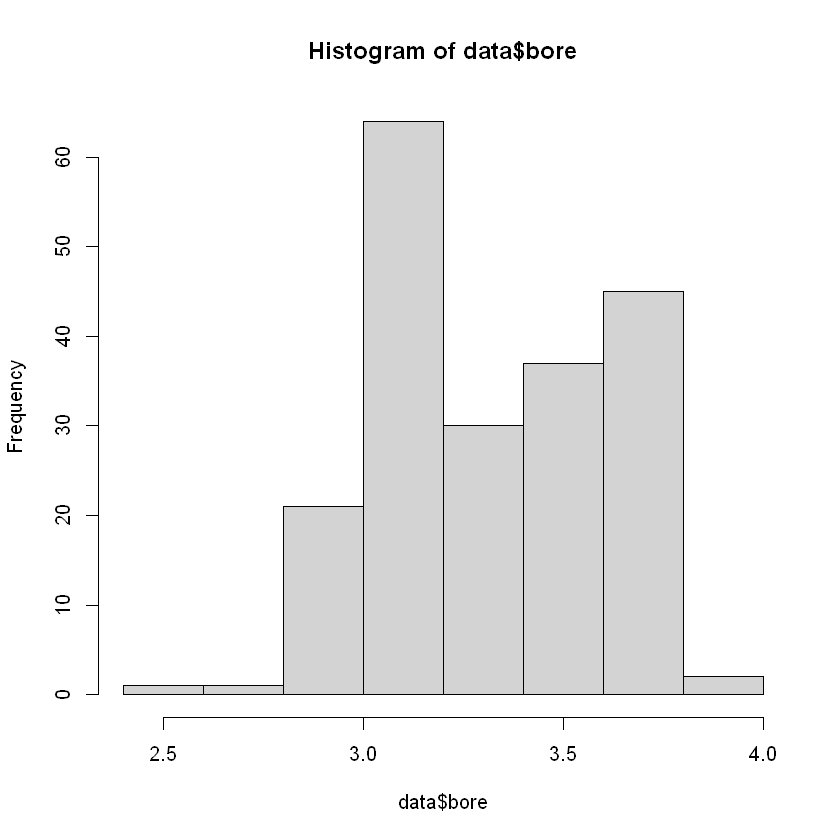

In [85]:
#Replace Missing Value: Bore
hist(data$bore)

In [86]:
data$bore[is.na(data$bore)] = mean(data$bore, na.rm = TRUE)
cek_missingvalue(data)

                  Missing
symboling               0
normalized.losses       0
make                    0
fuel.type               0
aspiration              0
num.of.doors            0
body.style              0
drive.wheels            0
engine.location         0
wheel.base              0
length                  0
width                   0
height                  0
curb.weight             0
engine.type             0
num.of.cylinders        0
engine.size             0
fuel.system             0
bore                    0
stroke                  4
compression.ratio       0
horsepower              2
peak.rpm                2
city.mpg                0
highway.mpg             0
price                   4


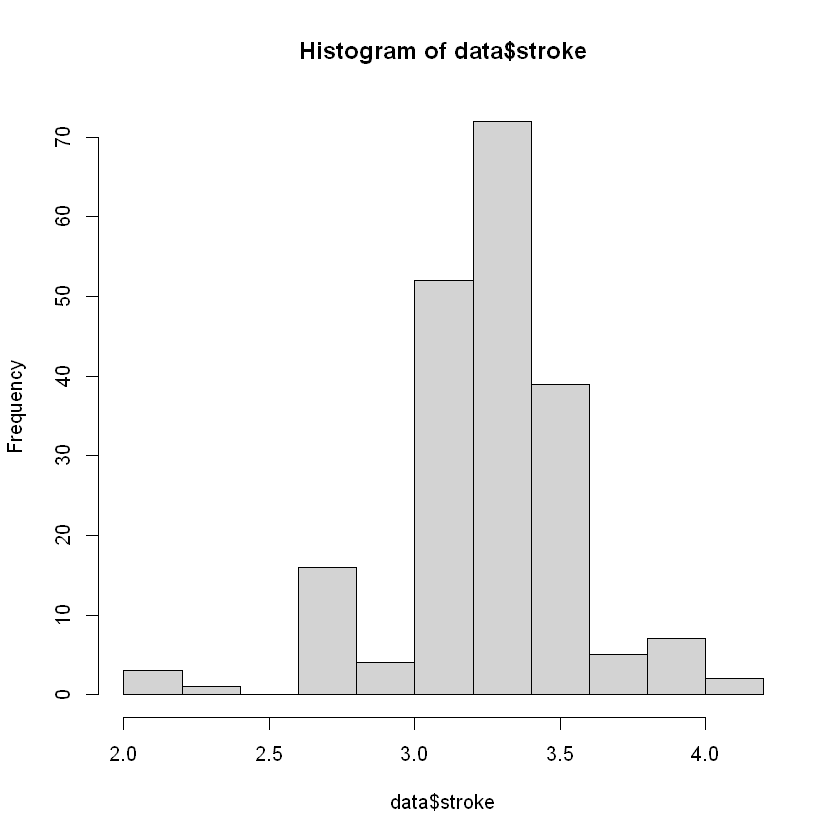

In [87]:
#Replace Missing Value: Stroke
hist(data$stroke)

In [88]:
data$stroke[is.na(data$stroke)] = median(data$stroke, na.rm = TRUE)
cek_missingvalue(data)

                  Missing
symboling               0
normalized.losses       0
make                    0
fuel.type               0
aspiration              0
num.of.doors            0
body.style              0
drive.wheels            0
engine.location         0
wheel.base              0
length                  0
width                   0
height                  0
curb.weight             0
engine.type             0
num.of.cylinders        0
engine.size             0
fuel.system             0
bore                    0
stroke                  0
compression.ratio       0
horsepower              2
peak.rpm                2
city.mpg                0
highway.mpg             0
price                   4


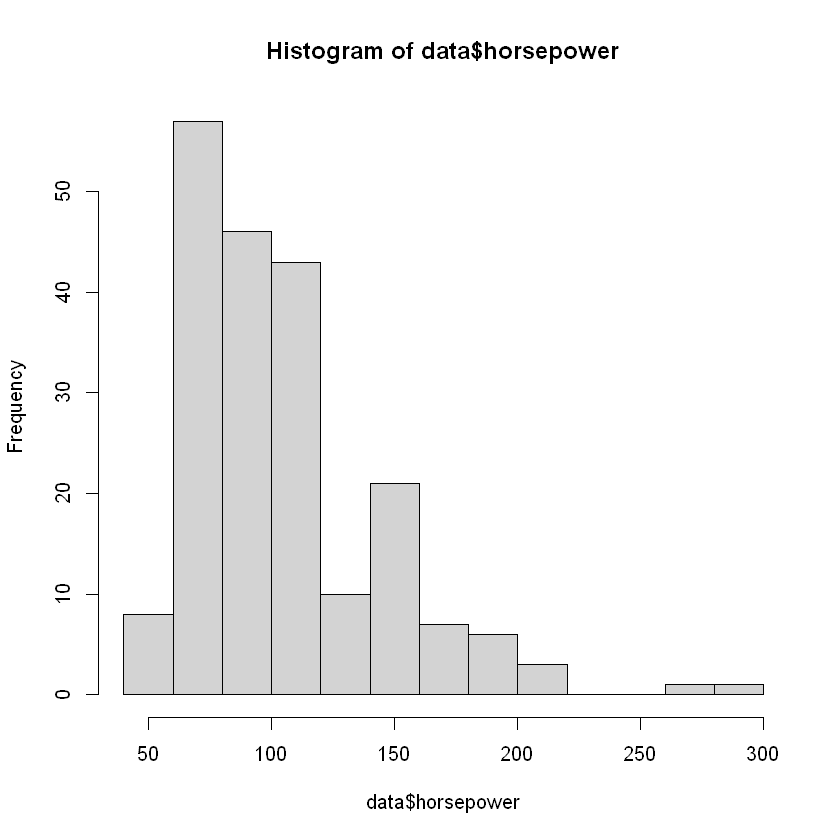

In [89]:
#Replace Missing Value: Horsepower
hist(data$horsepower)

In [90]:
data$horsepower[is.na(data$horsepower)] = median(data$horsepower, na.rm = TRUE)
cek_missingvalue(data)

                  Missing
symboling               0
normalized.losses       0
make                    0
fuel.type               0
aspiration              0
num.of.doors            0
body.style              0
drive.wheels            0
engine.location         0
wheel.base              0
length                  0
width                   0
height                  0
curb.weight             0
engine.type             0
num.of.cylinders        0
engine.size             0
fuel.system             0
bore                    0
stroke                  0
compression.ratio       0
horsepower              0
peak.rpm                2
city.mpg                0
highway.mpg             0
price                   4


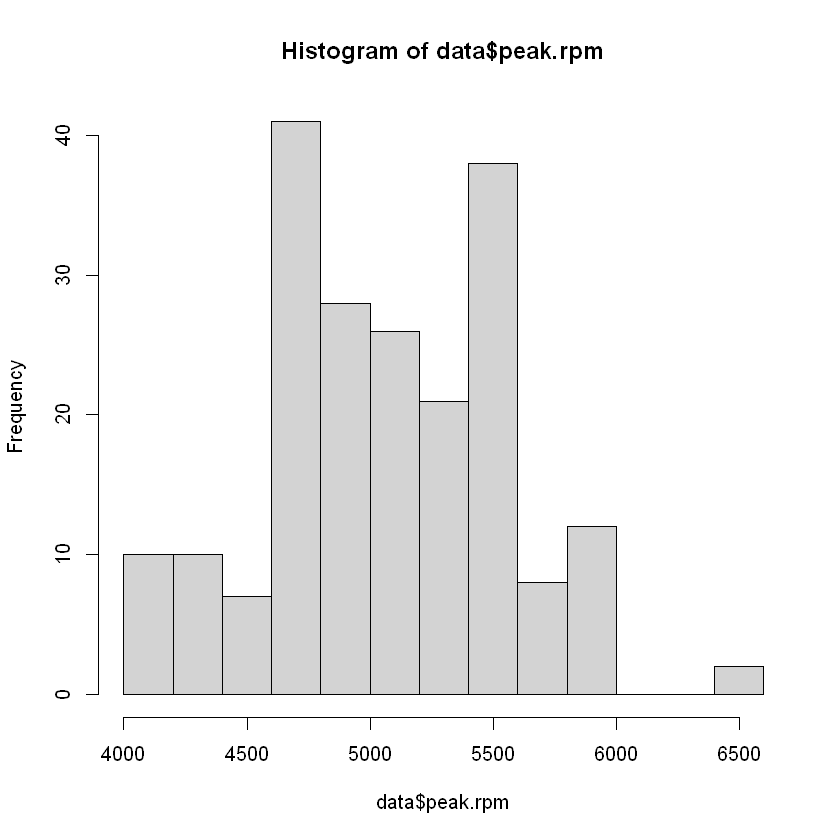

In [91]:
#Replace Missing Value: peak.rpm
hist(data$peak.rpm)

In [93]:
data$peak.rpm[is.na(data$peak.rpm)] = median(data$peak.rpm, na.rm = TRUE)
cek_missingvalue(data)

                  Missing
symboling               0
normalized.losses       0
make                    0
fuel.type               0
aspiration              0
num.of.doors            0
body.style              0
drive.wheels            0
engine.location         0
wheel.base              0
length                  0
width                   0
height                  0
curb.weight             0
engine.type             0
num.of.cylinders        0
engine.size             0
fuel.system             0
bore                    0
stroke                  0
compression.ratio       0
horsepower              0
peak.rpm                0
city.mpg                0
highway.mpg             0
price                   4


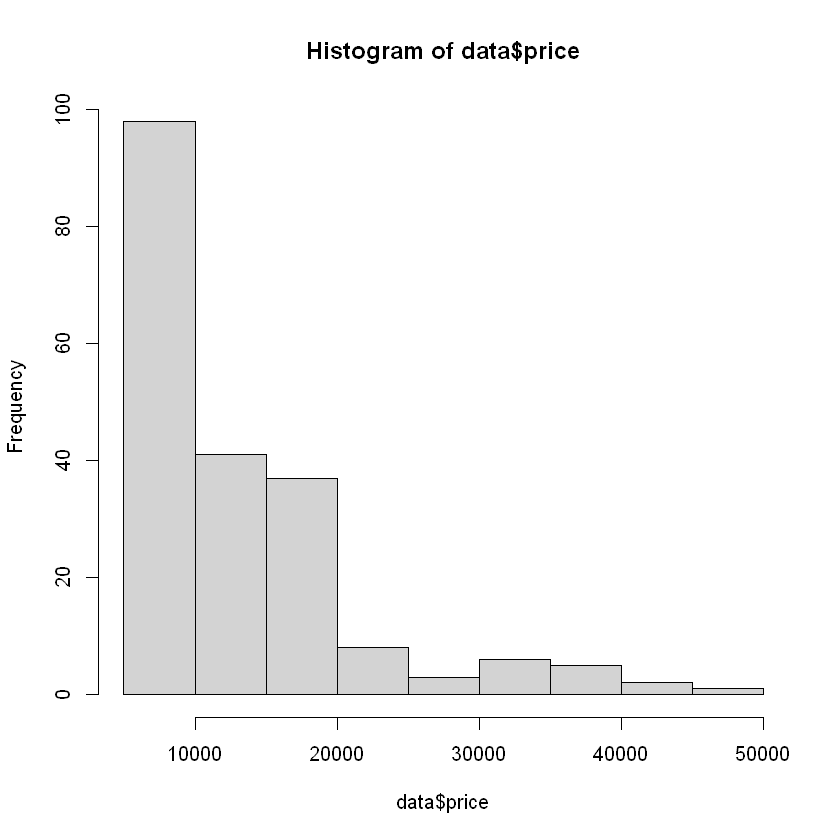

In [94]:
#Replace Missing Value: peak.rpm
hist(data$price)

In [95]:
data$price[is.na(data$price)] = median(data$price, na.rm = TRUE)
cek_missingvalue(data)

                  Missing
symboling               0
normalized.losses       0
make                    0
fuel.type               0
aspiration              0
num.of.doors            0
body.style              0
drive.wheels            0
engine.location         0
wheel.base              0
length                  0
width                   0
height                  0
curb.weight             0
engine.type             0
num.of.cylinders        0
engine.size             0
fuel.system             0
bore                    0
stroke                  0
compression.ratio       0
horsepower              0
peak.rpm                0
city.mpg                0
highway.mpg             0
price                   0


# EKSPLORASI DATA ANALYST

## 1. Statistik Deskriptif

In [97]:
summary(data)

   symboling       normalized.losses         make      fuel.type   aspiration 
 Min.   :-2.0000   Min.   : 65.0     toyota    : 32   diesel: 20   std  :168  
 1st Qu.: 0.0000   1st Qu.:101.0     nissan    : 18   gas   :185   turbo: 37  
 Median : 1.0000   Median :115.0     mazda     : 17                           
 Mean   : 0.8341   Mean   :120.6     honda     : 13                           
 3rd Qu.: 2.0000   3rd Qu.:137.0     mitsubishi: 13                           
 Max.   : 3.0000   Max.   :256.0     subaru    : 12                           
                                     (Other)   :100                           
 num.of.doors       body.style drive.wheels engine.location   wheel.base    
 four:116     convertible: 6   4wd:  9      front:202       Min.   : 86.60  
 two : 89     hardtop    : 8   fwd:120      rear :  3       1st Qu.: 94.50  
              hatchback  :70   rwd: 76                      Median : 97.00  
              sedan      :96                                

## 2. Uji Hipotesis 

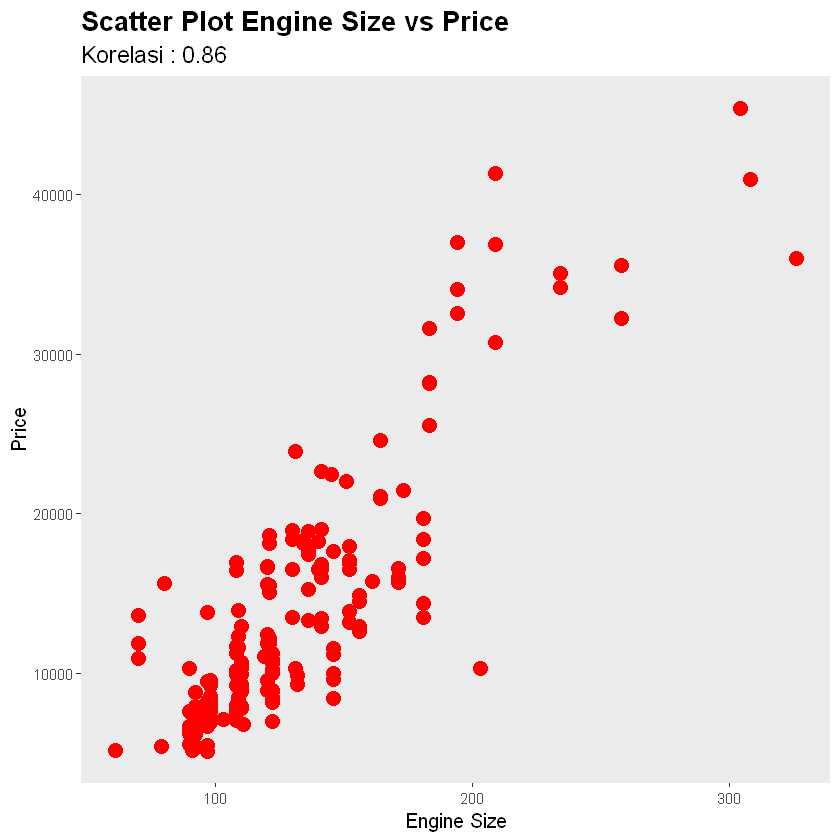

In [120]:
# Engine Size dengan Price
ggplot(data, aes(x = engine.size, y =price)) +
ggtitle(label = "Scatter Plot Engine Size vs Price",
        subtitle = paste("Korelasi :", round(cor(data$engine.size, data$price, method = "pearson"),2))) +
xlab("Engine Size") + ylab("Price")+
theme(plot.title = element_text(color="black", size = 16, face="bold"),
      plot.subtitle = element_text(color="black", size = 14),
      axis.title.x = element_text(color = "black", size = 12),
      axis.title.y = element_text(color = "black", size = 12),
      panel.grid = element_blank())+
geom_point(color = 'red', size = 4)

In [114]:
cor.test(data$engine.size, data$price, method = "pearson")


	Pearson's product-moment correlation

data:  data$engine.size and data$price
t = 24.049, df = 203, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8199811 0.8921910
sample estimates:
      cor 
0.8603427 


Berdasarkan hasil korelasi pearson antara engine size dan price diketahui bahwa p-value sebesar 0.000 sehingga dapat disimpulkan bahwa hipotesis menolak H0 maka kedua variabel memiliki hubungan dengan korelasi sebesar 0.86. Nilai 0.86 menandakan bahwa hubungan keduanya kuat dan sebanding.

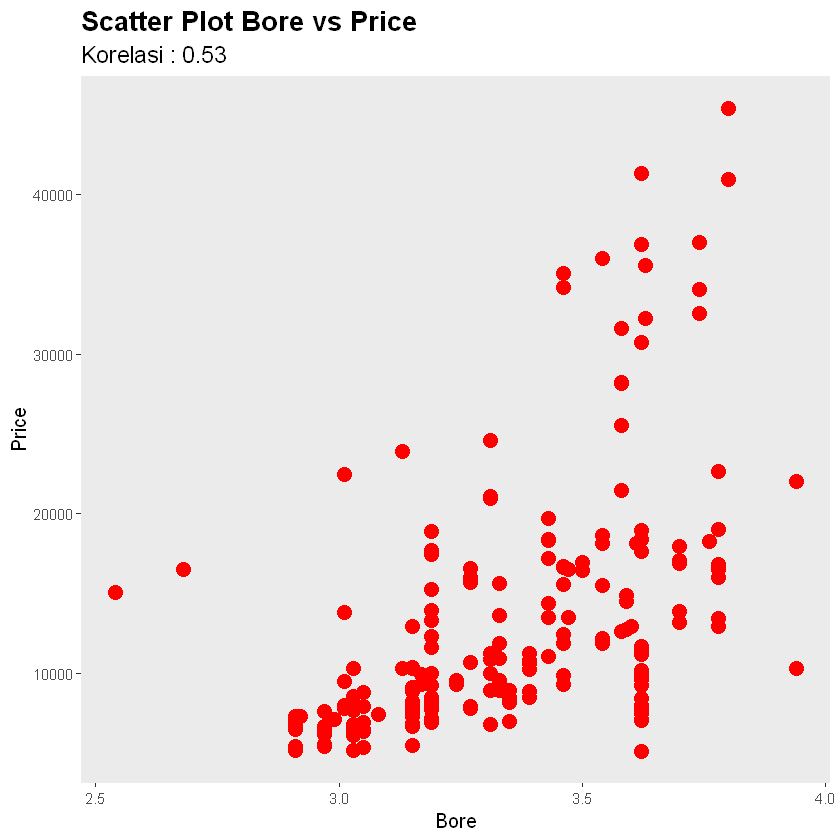

In [121]:
# Bore dengan Price
ggplot(data, aes(x = bore, y =price)) +
ggtitle(label = "Scatter Plot Bore vs Price",
        subtitle = paste("Korelasi :", round(cor(data$bore, data$price, method = "pearson"),2))) +
xlab("Bore") + ylab("Price")+
theme(plot.title = element_text(color="black", size = 16, face="bold"),
      plot.subtitle = element_text(color="black", size = 14),
      axis.title.x = element_text(color = "black", size = 12),
      axis.title.y = element_text(color = "black", size = 12),
      panel.grid = element_blank())+
geom_point(color = 'red', size = 4)

In [116]:
cor.test(data$bore, data$price, method = "pearson")


	Pearson's product-moment correlation

data:  data$bore and data$price
t = 8.9721, df = 203, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4270107 0.6243119
sample estimates:
      cor 
0.5328649 


Berdasarkan hasil korelasi pearson antara bore dan price diketahui bahwa p-value sebesar 0.000 sehingga dapat disimpulkan bahwa hipotesis menolak H0 maka kedua variabel memiliki hubungan dengan korelasi sebesar 0.53. Nilai 0.53 menandakan bahwa hubungan keduanya cukup kuat dan sebanding.

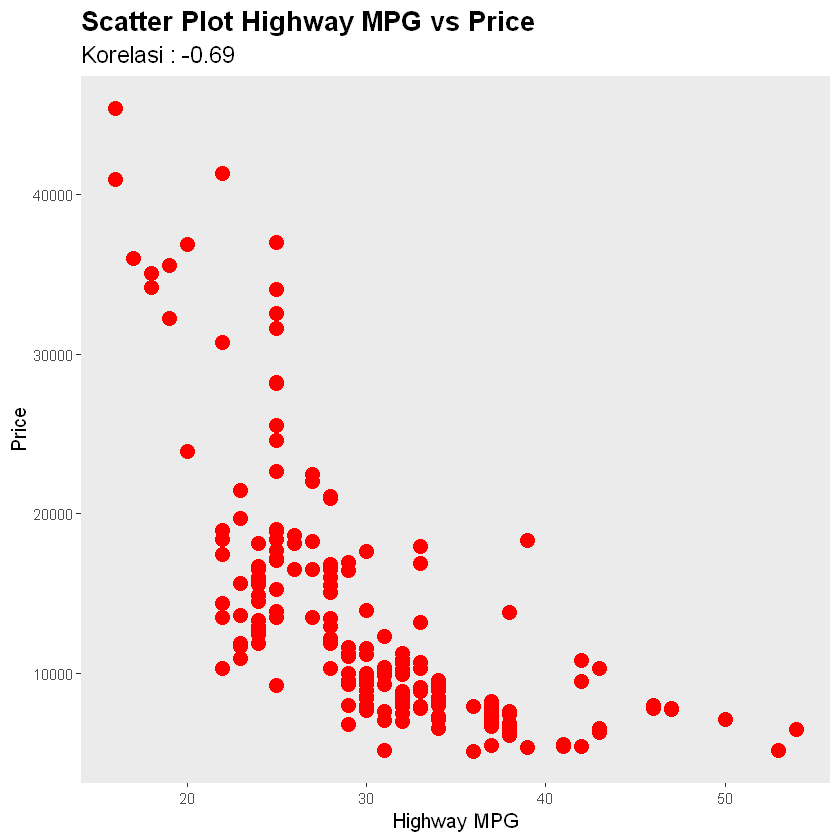

In [122]:
# Highway dengan Price
ggplot(data, aes(x = highway.mpg, y =price)) +
ggtitle(label = "Scatter Plot Highway MPG vs Price",
        subtitle = paste("Korelasi :", round(cor(data$highway.mpg , data$price, method = "pearson"),2))) +
xlab("Highway MPG") + ylab("Price")+
theme(plot.title = element_text(color="black", size = 16, face="bold"),
      plot.subtitle = element_text(color="black", size = 14),
      axis.title.x = element_text(color = "black", size = 12),
      axis.title.y = element_text(color = "black", size = 12),
      panel.grid = element_blank())+
geom_point(color = 'red', size = 4)

In [117]:
cor.test(data$highway.mpg , data$price, method = "pearson")


	Pearson's product-moment correlation

data:  data$highway.mpg and data$price
t = -13.697, df = 203, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7580774 -0.6143471
sample estimates:
       cor 
-0.6930373 


Berdasarkan hasil korelasi pearson antara highway mpg dan price diketahui bahwa p-value sebesar 0.000 sehingga dapat disimpulkan bahwa hipotesis menolak H0 maka kedua variabel memiliki hubungan dengan korelasi sebesar -0.69. Nilai -0.69 menandakan bahwa hubungan keduanya cukup kuat dan berbanding terbalik.